In [9]:
indir = 'C:\\Users\\Duc Le\\OneDrive - Hanoi University of Science and Technology\\Image Processing\\hand_pose\\skeleton_visualize\\skeleton'

In [10]:
import os,cv2,numpy as np,matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
all_seq = []
titles = []
for root,_,files in os.walk(indir):
    for f in tqdm(files):#tạo phần trăm (tqdm)
            seq = []
            lines = open(root+'/'+f,'rt').read().strip().split('\n')[1:]
            try:
                for l in lines:
                    timestamp,frame_index,person_index,skeleton_data,floor_equation = l.strip().split(',')
                    timestamp = int(timestamp)
                    frame_index = int(frame_index)
                    person_index = int(person_index)
                    skeleton_data = np.array([float(v) for v in skeleton_data.strip().split(' ')])
                    floor_equation  = np.array([float(v) for v in floor_equation.strip().split(' ')])
                    seq.append([timestamp,frame_index,person_index,skeleton_data,floor_equation])
            except:
                pass# tồn tại để khi vòng lặp trống code không bị lỗi 
            all_seq.append(seq)
            titles.append(f)
all_seq=np.array(all_seq)
print(all_seq.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 383/383 [03:33<00:00,  1.79it/s]


(383,)


In [13]:
actions_list = {}
lines = open('action_list.txt','rt').read().strip().split('\n')[1:]
for l in lines:
    arr = l.strip().split(',')
    actions_list[int(arr[0])] = arr[1]
print (actions_list)

{1: 'walk', 2: 'run_slowly', 3: 'static_jump', 4: 'move_hand_and_leg', 5: 'left_hand_pick_up', 6: 'right_hand_pick_up', 7: 'stagger', 8: 'front_fall', 9: 'back_fall', 10: 'left_fall', 11: 'right_fall', 12: 'crawl', 13: 'sit_on_chair_then_stand_up', 14: 'move_chair', 15: 'sit_on_chair_then_fall_left', 16: 'sit_on_chair_then_fall_right', 17: 'sit_on_bed_and_stand_up', 18: 'lie_on_bed_and_sit_up', 19: 'lie_on_bed_and_fall_left', 20: 'lie_on_bed_and_fall_right'}


In [14]:
import re

annotations = []
lines = open('annotation.csv','rt').read().strip().split('\n')[1:]
for l in lines:
    try: 
        l2 = re.sub(r'[^\x00-\x7f]',r'', l)  #remove non ascii chars
        setup_id,subject_id,kinect_id,action_id,start_frame,stop_frame = [int(v) for v in l2.strip().split(',')]
        annotations.append([setup_id,subject_id,kinect_id,action_id,start_frame,stop_frame])
    except:
        pass





### Get sekeleton for visualize

In [22]:
joints_order = [v-1 for v in [1,2,2,3,3,4,3,5,5,6,6,7,7,8,3,9,9,10,10,11,11,12,1,13,13,14,14,15,15,16,1,17,17,18,18,19,19,20]]
print(joints_order)

[0, 1, 1, 2, 2, 3, 2, 4, 4, 5, 5, 6, 6, 7, 2, 8, 8, 9, 9, 10, 10, 11, 0, 12, 12, 13, 13, 14, 14, 15, 0, 16, 16, 17, 17, 18, 18, 19]


[0, 1, 2, 2, 4, 5, 6, 2, 8, 9, 10, 0, 12, 13, 14, 0, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 2, 4, 5, 6, 2, 8, 9, 10, 0, 12, 13, 14, 0, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 2, 4, 5, 6, 2, 8, 9, 10, 0, 12, 13, 14, 0, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 2, 4, 5, 6, 2, 8, 9, 10, 0, 12, 13, 14, 0, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


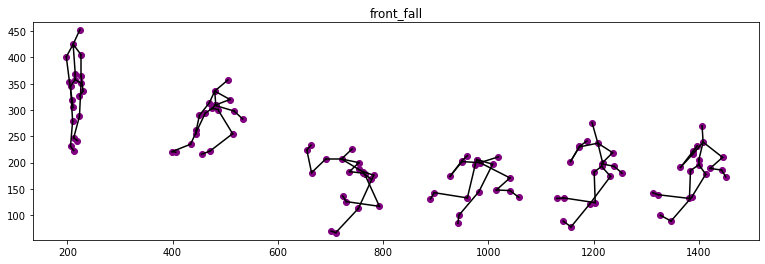

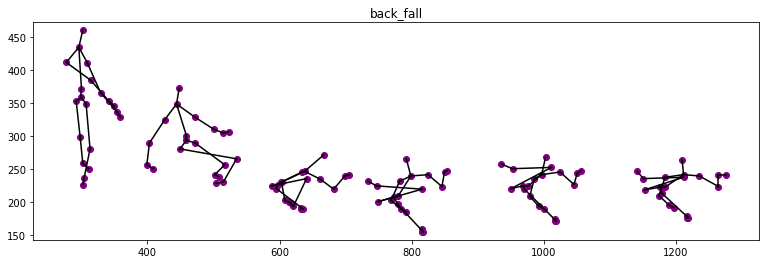

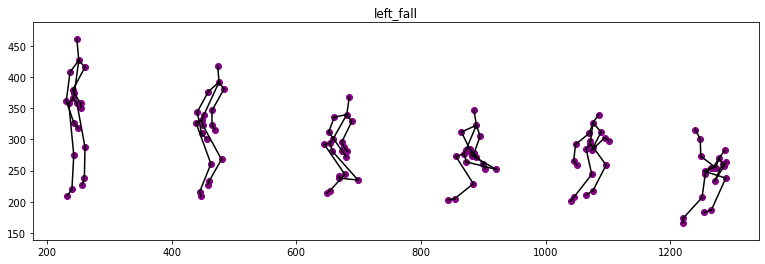

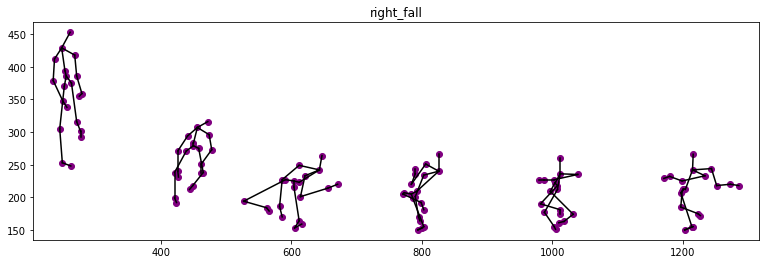

In [20]:
subject_test = 10
kinect_test = 3
actions = [8,9,10,11]
n_skels = 6
vis_seq = []
# get data
for action in actions:
    for [setup_id,subject_id,kinect_id,action_id,start_frame,stop_frame] in annotations:
        if action_id == action and subject_id == subject_test and kinect_test == kinect_id:
#             print [setup_id,subject_id,kinect_id,action_id,start_frame,stop_frame]
            title = 'S'+str(setup_id)+'P'+str(subject_id)+'K'+str(kinect_id)+'.txt'
            id_file =  titles.index(title)
            seq = []
            for [timestamp,frame_index,person_index,skeleton_data,floor_equation] in all_seq[id_file]:
                if frame_index>=start_frame and frame_index<=stop_frame:
                        seq.append(skeleton_data)
            vis_seq.append(seq)
            break

#draw
for action,seq in zip(actions,vis_seq):#4 actions
    step_size = int(len(seq)/float(n_skels))# chọn khoảng cách thời gian giữa 2 frame
    fig = plt.figure(figsize=(13,4))#tạo vùng hiển thị
    #print(action)
    for i in range(n_skels):#6 skeletons
        joints = seq[step_size*i]#chọn khung xương
        
        joints2 = joints.copy().reshape((20,5))[:,-2:]#reshape lại thành 20 hàng khớp và lấy 2 cột cuối cùng
        
        joints2[:,0] += i*200
        
        joints2[:,1] = 480-joints2[:,1]
        #print(joints2)
        xs = joints2[:,0]
        #print(xs)
        ys = joints2[:,1]
        plt.scatter(xs,ys,color='purple')
        #print(joints2)
        for id1,id2 in zip(joints_order[::2],joints_order[1::2]):#::2 - step =2
            xs, ys = [], []
            xs=[joints2[id1,0],joints2[id2,0]]
            ys=[joints2[id1,1],joints2[id2,1]]
            plt.plot(xs,ys,color=plt.cm.gray(0) )
            
    #print(join bts_order[::2])
    #print(joints_order[1::2])
           
    plt.title(actions_list[action])#titles
    plt.axis('equal')
    plt.savefig(actions_list[action]+'.eps')
